In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv("C:/Users/abhis/JupyterNotebooks/CI_Classes/Baaging_Boosting_CaseStudy/bank-full.csv", sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#Examine the metadata about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
## We will encode the target variable to 1 and 0 where 1 represents the <=50k defining the underpriviledged section of society.
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


#### Label encoding all the categorical variables since we need to provide the numbers to our model.

In [ ]:
# Import label encoder
from sklearn import preprocessing

# Create label_encoder object
label_encoder = preprocessing.LabelEncoder()

# Fetch categorical columns
categorical_columns = df.select_dtypes(['category', 'object']).columns

#Iterate over all the categorical columns
for col in categorical_columns:
    df[col]= label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
# specifying the independent and dependent set of variables
X = # specify accordingly
Y = # specify accordingly

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set

X_train, X_test, y_train, y_test = # specify accordingly

In [ ]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (31647, 16)
Shape of test set : (13564, 16)
Percentage of classes in training set:
0    0.881885
1    0.118115
Name: y, dtype: float64
Percentage of classes in test set:
0    0.885653
1    0.114347
Name: y, dtype: float64


In [ ]:
model = RandomForestClassifier()
# Write code to fit the model on your training data

# Calculate the accuracy on train set

1.0

In [ ]:
# Calculate the accuracy on test set

0.9058537304629902

#### Which metrics to choose for current scenario?

We need to understand that a model can make wrong predictions as:

Predicting a customer won't do the term deposit but in reality he will.

Predicting a customer will do the terms deposit but in reality he won't.

Which case is more important?

Bank will be more interested in the cases where a customer will do the term deposit in actual the prediction is opposite. From bank's prespective its a loss of opportunity which they can't risk.

Therefore, we will work with recall score which will be a suitable metrics to identify the first scenario.


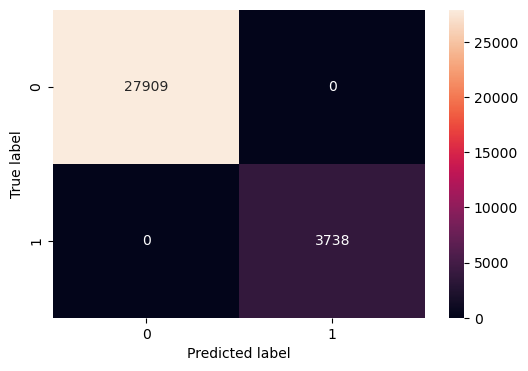

In [ ]:
# Apply a confusion Matrix and derive the precision, recall and f1 score

cm = confusion_matrix(y_train, model.predict(X_train))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
recall = recall_score(y_train, model.predict(X_train))  # to compute Recall
precision = precision_score(y_train, model.predict(X_train))  # to compute Precision
f1 = f1_score(y_train, model.predict(X_train))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 1.0, recall: 1.0, f1 score: 1.0


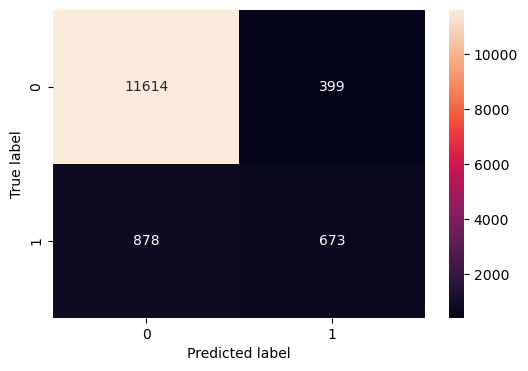

In [ ]:
# Apply a confusion Matrix and derive the precision, recall and f1 score

cm = confusion_matrix(y_test, model.predict(X_test))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
recall = recall_score(y_test, model.predict(X_test))  # to compute Recall
precision = precision_score(y_test, model.predict(X_test))  # to compute Precision
f1 = f1_score(y_test, model.predict(X_test))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.6277985074626866, recall: 0.4339136041263701, f1 score: 0.5131528783835304


## Observations:

We are clearly seeing overfitting in random forest by default. The recall score is dropping to 43.4% as compared to 100% in train set.

This proves that bagging doesn't automatically make the model variance proof. We will still have to perform certain steps to fight the overfitting.